# Анализ доходов жителей США

## Подготовка к выполнению

1. Импорт необходимых библиотек

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## Выполнение заданий

### Описание данных


***Источник данных:*** [данные о доходах взрослого населения США](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

***Набор данных включает в себя информацию о демографических характеристиках(возраст, пол, раса), образовании, занятости и доходе.***

In [18]:
data_path = './adult.csv'
data = pd.read_csv(data_path)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Фильтрация

#### Фильтрация по одному условию

In [19]:
bachelors = data[data['education'] == 'Bachelors']
bachelors.shape

(8025, 15)

В данных 8025 человек, которые имеют степень образования 'Бакалавр'.

#### Фильтрация по нескольким условиям

In [20]:
black_women = data[(data['race'] == 'Black') & (data['gender'] == 'Female') & (data['education'] == 'Bachelors') & (
        data['income'] == '>50K')]
black_women.shape

(40, 15)

В данных 40 женщин афроамериканского происхождения, которые имеют бакалаврскую степень образования.

### Сортировка

#### Сортировка по возрастанию

In [21]:
ascending_sort = data.sort_values(by='hours-per-week')
ascending_sort['hours-per-week'].iloc[0]

np.int64(1)

В данных наименьшее число часов работы в неделю составляет 1 час. 

#### Сортировка по убыванию

In [22]:
descending_sort = data.sort_values(by='age', ascending=False)
descending_sort['age'].iloc[0]

np.int64(90)

Возраст самого старого человека, представленного в данных составляет 90 лет.

### Частотная таблица

In [23]:
education_counts = data['education'].value_counts()
education_counts

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Частотная таблица показывает, что самое часто встречающееся образование среди опрошенных - выпускник старшей школы "HS-grad"

### Гистограмма

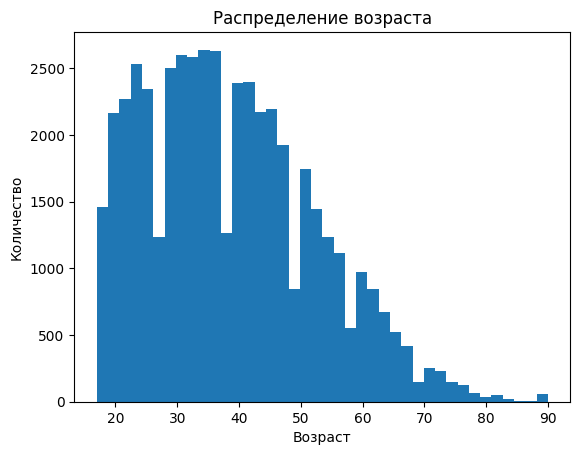

In [24]:
plt.hist(data['age'], bins=40)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возраста')
plt.show()

### Столбчатая диаграмма

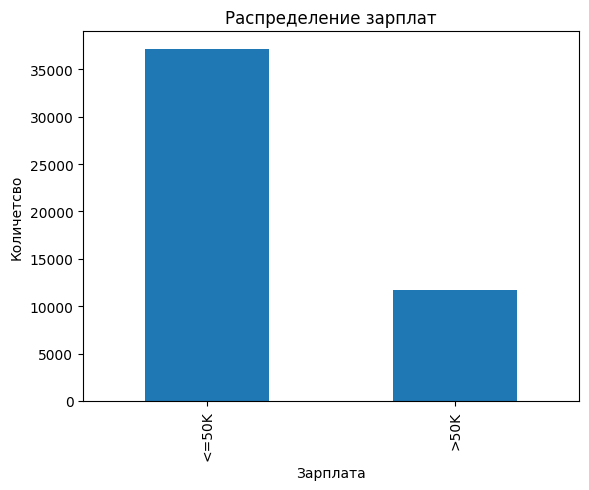

In [25]:
data['income'].value_counts().plot(kind='bar')
plt.xlabel('Зарплата')
plt.ylabel('Количетсво')
plt.title('Распределение зарплат')
plt.show()

### Круговая диаграмма

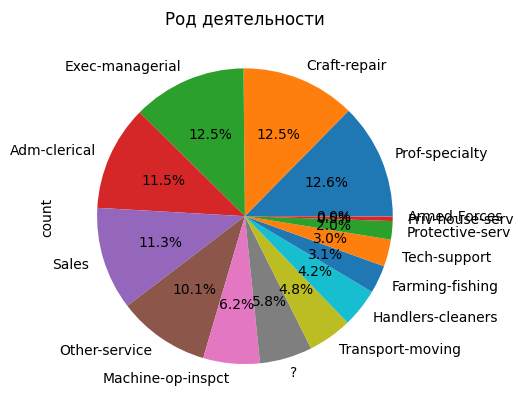

In [26]:
data['occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Род деятельности')
plt.show()

### Создание новых признаков

#### Создание нового признака с помощью анонимной функции

In [27]:
data['foreigners'] = data['native-country'].apply(lambda x: 'Native' if x == 'United-States' else 'Foreigner')


#### Создание нового признака с помощью def

In [28]:
def categorize_education(education) -> str:
    if education in ['Bachelors', 'Masters', 'Doctorate']:
        return 'Higher education'
    else:
        return 'Other'


data['education-category'] = data['education'].apply(categorize_education)
data['education-category'].value_counts()

education-category
Other               37566
Higher education    11276
Name: count, dtype: int64

### Группировки

#### Группировка один столбец группировки/один столбец агрегирования/один метод агрегирования

In [29]:
average_age_by_gender = data.groupby('gender')['age'].mean()
average_age_by_gender

gender
Female    36.927989
Male      39.494395
Name: age, dtype: float64

#### Группировка один столбец группировки/несколько столбцов агрерирования/один метод агрегирования

In [30]:
group_by_education = data.groupby('education')[['age', 'hours-per-week']].mean()
group_by_education

,age,hours-per-week
education,,
10th,37.902808,36.986321
11th,32.141832,33.952539
12th,32.235921,35.374429
1st-4th,46.639676,38.761134
5th-6th,43.585462,38.923379
7th-8th,49.525654,39.003141
9th,40.902116,38.359788
Assoc-acdm,37.777014,40.809494
Assoc-voc,38.651140,41.658418


#### Группировка один столбец группировки/один столбец агрегирования/несколько методов агрегирования

In [31]:
data.groupby('education')['age'].agg(['min', 'max'])

,min,max
education,,
10th,17,90
11th,17,90
12th,17,81
1st-4th,19,90
5th-6th,17,84
7th-8th,17,90
9th,17,90
Assoc-acdm,19,90
Assoc-voc,19,84


#### Группировка один столбец группировки/несколько столбцов агрегирования/несколько методов агрегирования

In [32]:
data.groupby('workclass').agg({'age': ['mean'], 'hours-per-week': ['mean', 'median']})

age hours-per-week       
                       mean           mean median
workclass                                        
?                 40.141122      31.812433   36.0
Federal-gov       42.577514      41.513268   40.0
Local-gov         41.676020      40.847258   40.0
Never-worked      19.900000      28.900000   35.0
Private           36.903144      40.273137   40.0
Self-emp-inc      45.799410      48.570501   50.0
Self-emp-not-inc  45.332470      44.395132   40.0
State-gov         39.512367      39.090863   40.0
Without-pay       47.285714      33.952381   40.0